## Beam time : 18-FEB-2020 to 23-FEB-2020 at VERITAS
### Step size is set as 0.25 eV, the acquiring time is 15 s, and the slit size is 500 um
### The energy scale is not calibrated  

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import h5py
import sys
sys.path.insert(0, '../src1/')
import fit_data_tools
from fit_data_tools import *
from matplotlib.ticker import MultipleLocator, FormatStrFormatter, AutoMinorLocator

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


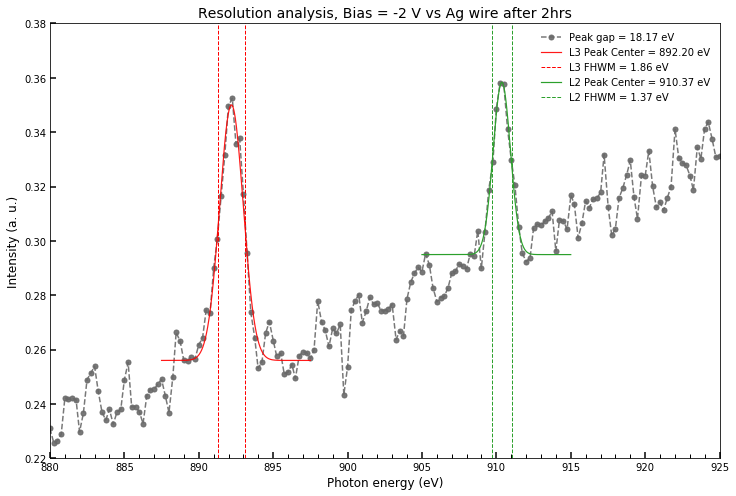

In [13]:
scan =[107]
I_0 = 'gold' #gold or mirror
Energy_scale = 'beamline_energy' # 'beamline_energy' 'undulator_energy' 

#fig, ax = plt.subplots(figsize=[10,6])

data_path = '/Users/hsin-yiwang/Desktop/Veritas_Data/'
h5file = h5py.File(data_path+'20200219_1.h5', 'r')
    
if Energy_scale =='beamline_energy':
    Ev_scale = h5file['/entry%02d/' %scan[0]+'measurement/beamline_energy'].value
else: 
    Ev_scale = h5file['/entry%02d/' %scan[0]+'measurement/b_m4_vertical'].value

if I_0 == 'gold':
    I0 = h5file['/entry%02d/' %scan[0]+'measurement/aemexp2_ch1'].value
else:
    I0 = h5file['/entry%02d/' %scan[0]+'measurement/aemexp2_ch2'].value
       
If = h5file['/entry%02d/' %scan[0]+'measurement/aemexp2_ch3'].value

Intensity = []
for i in range(len(I0)):
    intensity = If[i]/I0[i]
    Intensity.append(intensity)
Intensity = np.array(Intensity)
Ev_scale = np.array(Ev_scale)
Filter1 = np.all([Ev_scale >= 887.5,Ev_scale <= 897.5],axis = 0)
Filter2 = np.all([Ev_scale >= 905,Ev_scale <= 915],axis = 0)
I_Sect1 = Intensity[Filter1]
E_Sect1 = Ev_scale[Filter1]
I_Sect2 = Intensity[Filter2]
E_Sect2 = Ev_scale[Filter2]
popt1,xc1,curve1,perr1 = fit(gaussian, E_Sect1, I_Sect1, p0=[max(I_Sect1),E_Sect1[I_Sect1==max(I_Sect1)]-0.5,1.,0.])
popt2,xc2,curve2,perr2 = fit(gaussian, E_Sect2, I_Sect2, p0=[max(I_Sect2),E_Sect2[I_Sect2==max(I_Sect2)]-0.5,1.,0.])

xc1_Filter = np.all([xc1 >= 887.5,xc1 <= 897.5],axis = 0)
xc1 =xc1[xc1_Filter]
curve1 = curve1[xc1_Filter]

xc2_Filter = np.all([xc2 >= 905,xc2 <= 915],axis = 0)
xc2 =xc2[xc2_Filter]
curve2 = curve2[xc2_Filter]

## Plot out the figures
fig, ax = plt.subplots(figsize=[12,8])
plt.plot(Ev_scale,Intensity ,'--o',markersize = 5, c = 'dimgray', alpha = 0.9, label = 'Peak gap = %.2f eV' %(popt2[1]-popt1[1]))
plt.plot(xc1,curve1,c='r',lw=1.2, ls='-', alpha = 0.9, label = 'L3 Peak Center = %.2f eV'%popt1[1])
plt.axvline(x=popt1[1]+popt1[2]/2,ls='--',c='r',label='L3 FHWM = %.2f eV'%popt1[2],lw=1)
plt.axvline(x=popt1[1]-popt1[2]/2,ls='--',c='r',lw=1)
plt.plot(xc2,curve2,c='tab:green',lw=1.2, ls='-', alpha = 1, label = 'L2 Peak Center = %.2f eV'%popt2[1])
plt.axvline(x=popt2[1]+popt2[2]/2,ls='--',c='tab:green',label='L2 FHWM = %.2f eV'%popt2[2],lw=1)
plt.axvline(x=popt2[1]-popt2[2]/2,ls='--',c='tab:green',lw=1)


plt.tick_params(direction='in', length=6, width=1.5, axis='both', which='major', labelsize=10)
plt.tick_params(direction='in', length=4, width=1, axis='both', which='minor', labelsize=10)
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_minor_locator(MultipleLocator(1))
#ax.yaxis.set_major_locator(MultipleLocator(0.5))
#ax.yaxis.set_minor_locator(MultipleLocator(0.1))
plt.xlim(880,925)
plt.ylim(0.22,0.38)
#plt.grid(True)
#plt.tight_layout()
plt.legend(frameon=False,loc='best', prop={'size': 10})
plt.title('Resolution analysis, Bias = -2 V vs Ag wire after 2hrs', size=14)
plt.xlabel('Photon energy (eV)',size=12)
plt.ylabel('Intensity (a. u.)',size=12)
plt.savefig(data_path +'/-2V after 2 hrs.png', dpi=300)
plt.show()